#  파일럿 프로젝트 : 호주 강우 예측
---
<img src="https://storage.googleapis.com/kaggle-datasets-images/6012/1733506/0a5af086168a9b87a38b29bac75aa8ce/dataset-cover.jpg?t=2020-12-11-10-57-11">

### 설명

 * **목표**
 > 다음날 비가 올지 여부를 분류 모델을 사용하여 목표변수 RainTomorrow로써 예측한다.
 * **개요**
 > 이 데이터셋은 호주 전역 다양한 장소에서 10년동안 매일 관측된 자료를 포함한다.
 예측해야하는 목표 변수는 RainTomorrow로써 Yes or No로 나뉠 수 있다. 만약 Yes라면 다음날 비가 1mm 이상이라는 의미가 된다.
 * **출처**
 > Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml
Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.
Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

 * **데이터**
 > * Features
 >> Date : 관측 날짜  
 >> Location : 관측 장소  
 >> MinTemp : 최저 기온(섭씨) 
 >>MaxTemp : 최고 기온(섭씨  
 >>Rainfall : 일일 강우량(mm)  
 >>Evaporation : 증발량(mm)  
 >>Sunshine : 일사 시간   
 >>WindGustDir : 일일 최고 풍향  
 >>WindGustSpeed : 일일 최고 풍속  
 >>WindDir9am : 오전 9시 풍향  
 >>WindDir3pm : 오후 3시 풍향  
 >>WindSpeed9am : 오전 9시까지의 평균 풍속  
 >>WindSpeed3pm : 오후 3시까지의 평균 풍속  
 >>Humidity9am : 오전 9시의 습도(%)  
 >>Humidity3pm : 오후 3시의 습도(%)   
 >>Pressure9am : 오전 9시의 평균 해수면 대기압(hpa)  
 >>Pressure3pm : 오후 3시의 평균 해수면 대기압(hpa)  
 >>Cloud9am : 오전 9시의 운량(okta)  
 >>Cloud3pm : 오후 3시의 운량(okta)    
 >>Temp9am : 오전 9시의 온도(섭씨)  
 >>Temp3pm : 오후 3시의 온도(섭씨)  
 >>RainToday : 일일 강우 유무(1mm이상)  
 
 >  * **Target**
 >> RainTomorrow : 다음날 일일 강우 유무(1mm 이상)

<img src="https://greenharvest.com.au/Images/Miscellaneous/AustralianClimateZoneMap.png">

### 데이터 분석 / 전처리

In [170]:
# 연산/데이터 관련 라이브러리 호출
import numpy as np
import pandas as pd

# 시각화 관련 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#기계학습 관련 라이브러리 호출
from sklearn.model_selection import train_test_split

In [206]:
# 데이터 불러오기
df = pd.read_csv('weatherAUS.csv', index_col=None)

In [16]:
# 데이터 확인
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

 * 대략적으로 데이터를 살펴본 결과 :   
> * 결측치가 존재, 이를 해결해야 한다.  
> * 기계학습을 위해 데이터 타입을 변환시킬 필요가 있어 보인다.
> * 정규화가 필요해 보인다.  

다음 날 비가 올지를 예측하기 위해서는 기준이 필요하다.  
왜냐하면 호주는 아주 큰 대륙이기 때문에 지역에 따라서 같은 시간이여도 날씨가 매우 다르기 때문이다.  
**따라서 해당 데이터를 지역에 따라서 나누어 생각해 볼 필요가 있다.**

In [42]:
# 지역 확인
df['Location'].unique(), df['Location'].nunique()

(array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
        'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
        'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
        'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
        'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
        'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
        'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object),
 49)

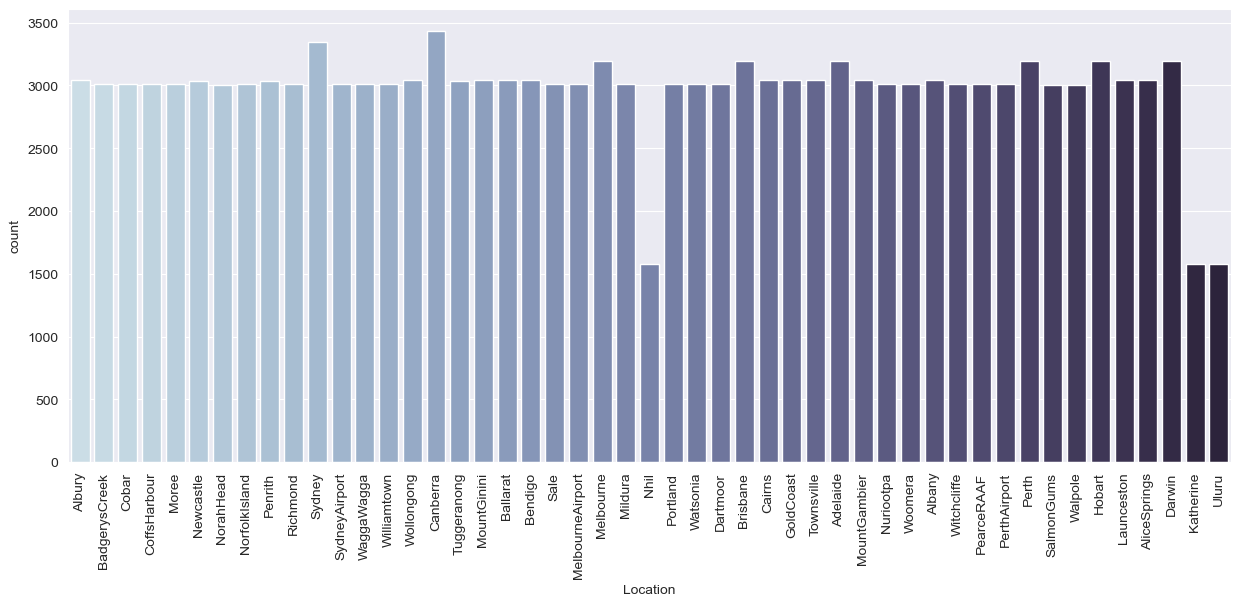

In [111]:
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(x = df['Location'],data = df, palette='ch:s=.25,rot=-.25')
sns.set_style('darkgrid')
plt.xticks(rotation=90)
plt.show()

우선 Sydney를 사용하겠다.

In [207]:
sydney_df = df.loc[df['Location'] == 'Sydney']

In [208]:
sydney_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
30176  2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
30177  2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
30178  2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
30179  2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
30180  2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   
...           ...      ...      ...      ...       ...          ...       ...   
33515  2017-06-21   Sydney      8.6     19.6       0.0          2.0       7.8   
33516  2017-06-22   Sydney      9.3     19.2       0.0          2.0       9.2   
33517  2017-06-23   Sydney      9.4     17.7       0.0          2.4       2.7   
33518  2017-06-24   Sydney     10.1     19.3       0.0          1.4       9.3   
33519  2017-06-25   Sydney      7.6     19.3       0.0          3.4       9.4   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
30176         NaN            NaN          S        SSW          17.0   
30177         NaN            NaN          W          E           9.0   
30178         NaN            NaN        ESE        ESE          17.0   
30179         NaN            NaN        NNE          E          22.0   
30180         NaN            NaN        NNE          W          11.0   
...           ...            ...        ...        ...           ...   
33515         SSE           37.0          W        SSE          22.0   
33516           W           30.0          W        ESE          20.0   
33517           W           24.0        WNW          N          15.0   
33518           W           43.0          W          W          17.0   
33519           W           35.0          W          W          13.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
30176          20.0         92.0         84.0       1017.6       1017.4   
30177          13.0         83.0         73.0       1017.9       1016.4   
30178           2.0         88.0         86.0       1016.7       1015.6   
30179          20.0         83.0         90.0       1014.2       1011.8   
30180           6.0         88.0         74.0       1008.3       1004.8   
...             ...          ...          ...          ...          ...   
33515          20.0         73.0         52.0       1025.9       1025.3   
33516           7.0         78.0         53.0       1028.5       1024.6   
33517          13.0         85.0         56.0       1020.8       1015.0   
33518          19.0         56.0         35.0       1017.3       1015.1   
33519          13.0         73.0         32.0       1018.6       1015.4   

       Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
30176       8.0       8.0     20.7     20.9       Yes          Yes  
30177       7.0       7.0     22.4     24.8       Yes          Yes  
30178       7.0       8.0     23.5     23.0       Yes          Yes  
30179       8.0       8.0     21.4     20.9       Yes          Yes  
30180       8.0       8.0     22.5     25.5       Yes          Yes  
...         ...       ...      ...      ...       ...          ...  
33515       2.0       2.0     10.5     17.9        No           No  
33516       2.0       2.0     11.0     18.7        No           No  
33517       6.0       6.0     10.2     17.3        No           No  
33518       5.0       2.0     12.4     19.0        No           No  
33519       1.0       1.0      9.4     18.8        No           No  

[3344 rows x 23 columns]

In [120]:
# 결측치 확인
sydney_df.isnull().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        15
Humidity3pm        13
Pressure9am        21
Pressure3pm        19
Cloud9am          568
Cloud3pm          563
Temp9am             5
Temp3pm             4
RainToday           7
RainTomorrow        7
dtype: int64

In [163]:
# 데이터 타입이 연속형인 데이터만 추출
floats = sydney_df
for col in sydney_df.columns:
    if sydney_df[col].dtype != 'float64':
        floats.drop(columns=col, inplace=True)
floats

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
30176     19.5     22.4      15.6          6.2       0.0            NaN   
30177     19.5     25.6       6.0          3.4       2.7            NaN   
30178     21.6     24.5       6.6          2.4       0.1            NaN   
30179     20.2     22.8      18.8          2.2       0.0            NaN   
30180     19.7     25.7      77.4          NaN       0.0            NaN   
...        ...      ...       ...          ...       ...            ...   
33515      8.6     19.6       0.0          2.0       7.8           37.0   
33516      9.3     19.2       0.0          2.0       9.2           30.0   
33517      9.4     17.7       0.0          2.4       2.7           24.0   
33518     10.1     19.3       0.0          1.4       9.3           43.0   
33519      7.6     19.3       0.0          3.4       9.4           35.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
30176          17.0          20.0         92.0         84.0       1017.6   
30177           9.0          13.0         83.0         73.0       1017.9   
30178          17.0           2.0         88.0         86.0       1016.7   
30179          22.0          20.0         83.0         90.0       1014.2   
30180          11.0           6.0         88.0         74.0       1008.3   
...             ...           ...          ...          ...          ...   
33515          22.0          20.0         73.0         52.0       1025.9   
33516          20.0           7.0         78.0         53.0       1028.5   
33517          15.0          13.0         85.0         56.0       1020.8   
33518          17.0          19.0         56.0         35.0       1017.3   
33519          13.0          13.0         73.0         32.0       1018.6   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
30176       1017.4       8.0       8.0     20.7     20.9  
30177       1016.4       7.0       7.0     22.4     24.8  
30178       1015.6       7.0       8.0     23.5     23.0  
30179       1011.8       8.0       8.0     21.4     20.9  
30180       1004.8       8.0       8.0     22.5     25.5  
...            ...       ...       ...      ...      ...  
33515       1025.3       2.0       2.0     10.5     17.9  
33516       1024.6       2.0       2.0     11.0     18.7  
33517       1015.0       6.0       6.0     10.2     17.3  
33518       1015.1       5.0       2.0     12.4     19.0  
33519       1015.4       1.0       1.0      9.4     18.8  

[3344 rows x 16 columns]

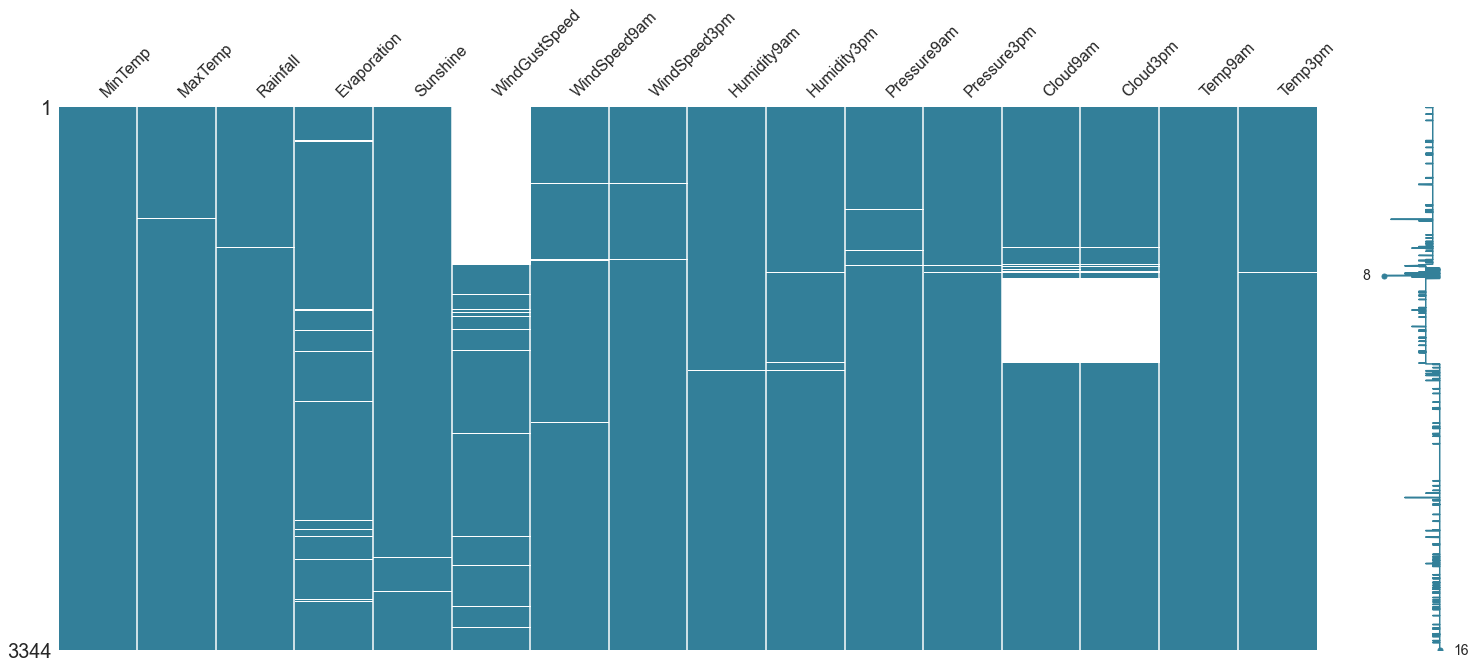

In [202]:
# 결측치 시각화
msno.matrix(floats,color=[.2,.5,.6])
plt.show()

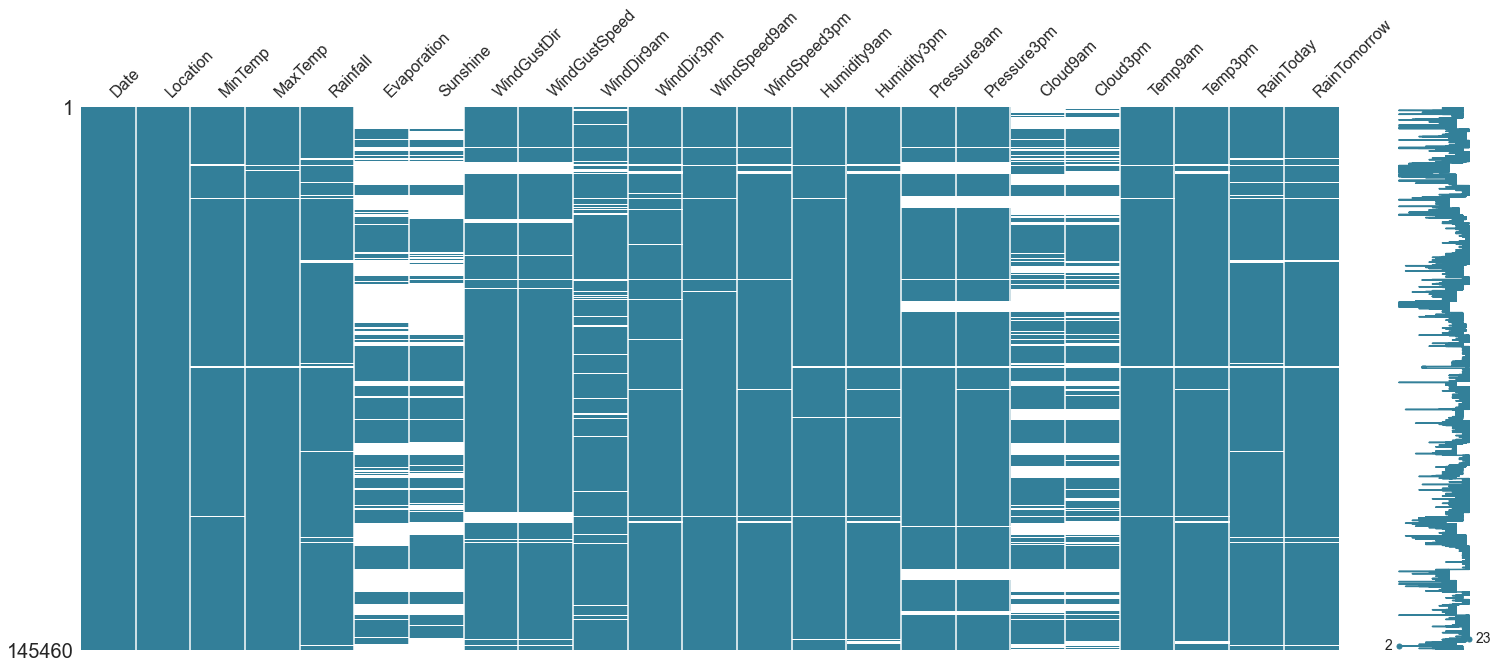

In [205]:
# 전체 데이터 결측치 시각화
msno.matrix(df,color=[.2,.5,.6])
plt.show()

* 최고 풍속, 오전 9시 운량, 오후 3시 운량이 각각 꽤 오랜기간동안 관측이 되지 않은 사실을 알 수 있다.
* 따라서 이런 경우는 두가지 방법을 적용할 수 있다
 > 1. 해당 특징을 사용하지 않는다.  
 > 2. 상관관계가 강한 다른 특징을 이용해 유추한다.
* 그 외에 연속적인 결측값의 빈도가 낮은 특징들은 근처 값들의 평균을 이용해 채운다.

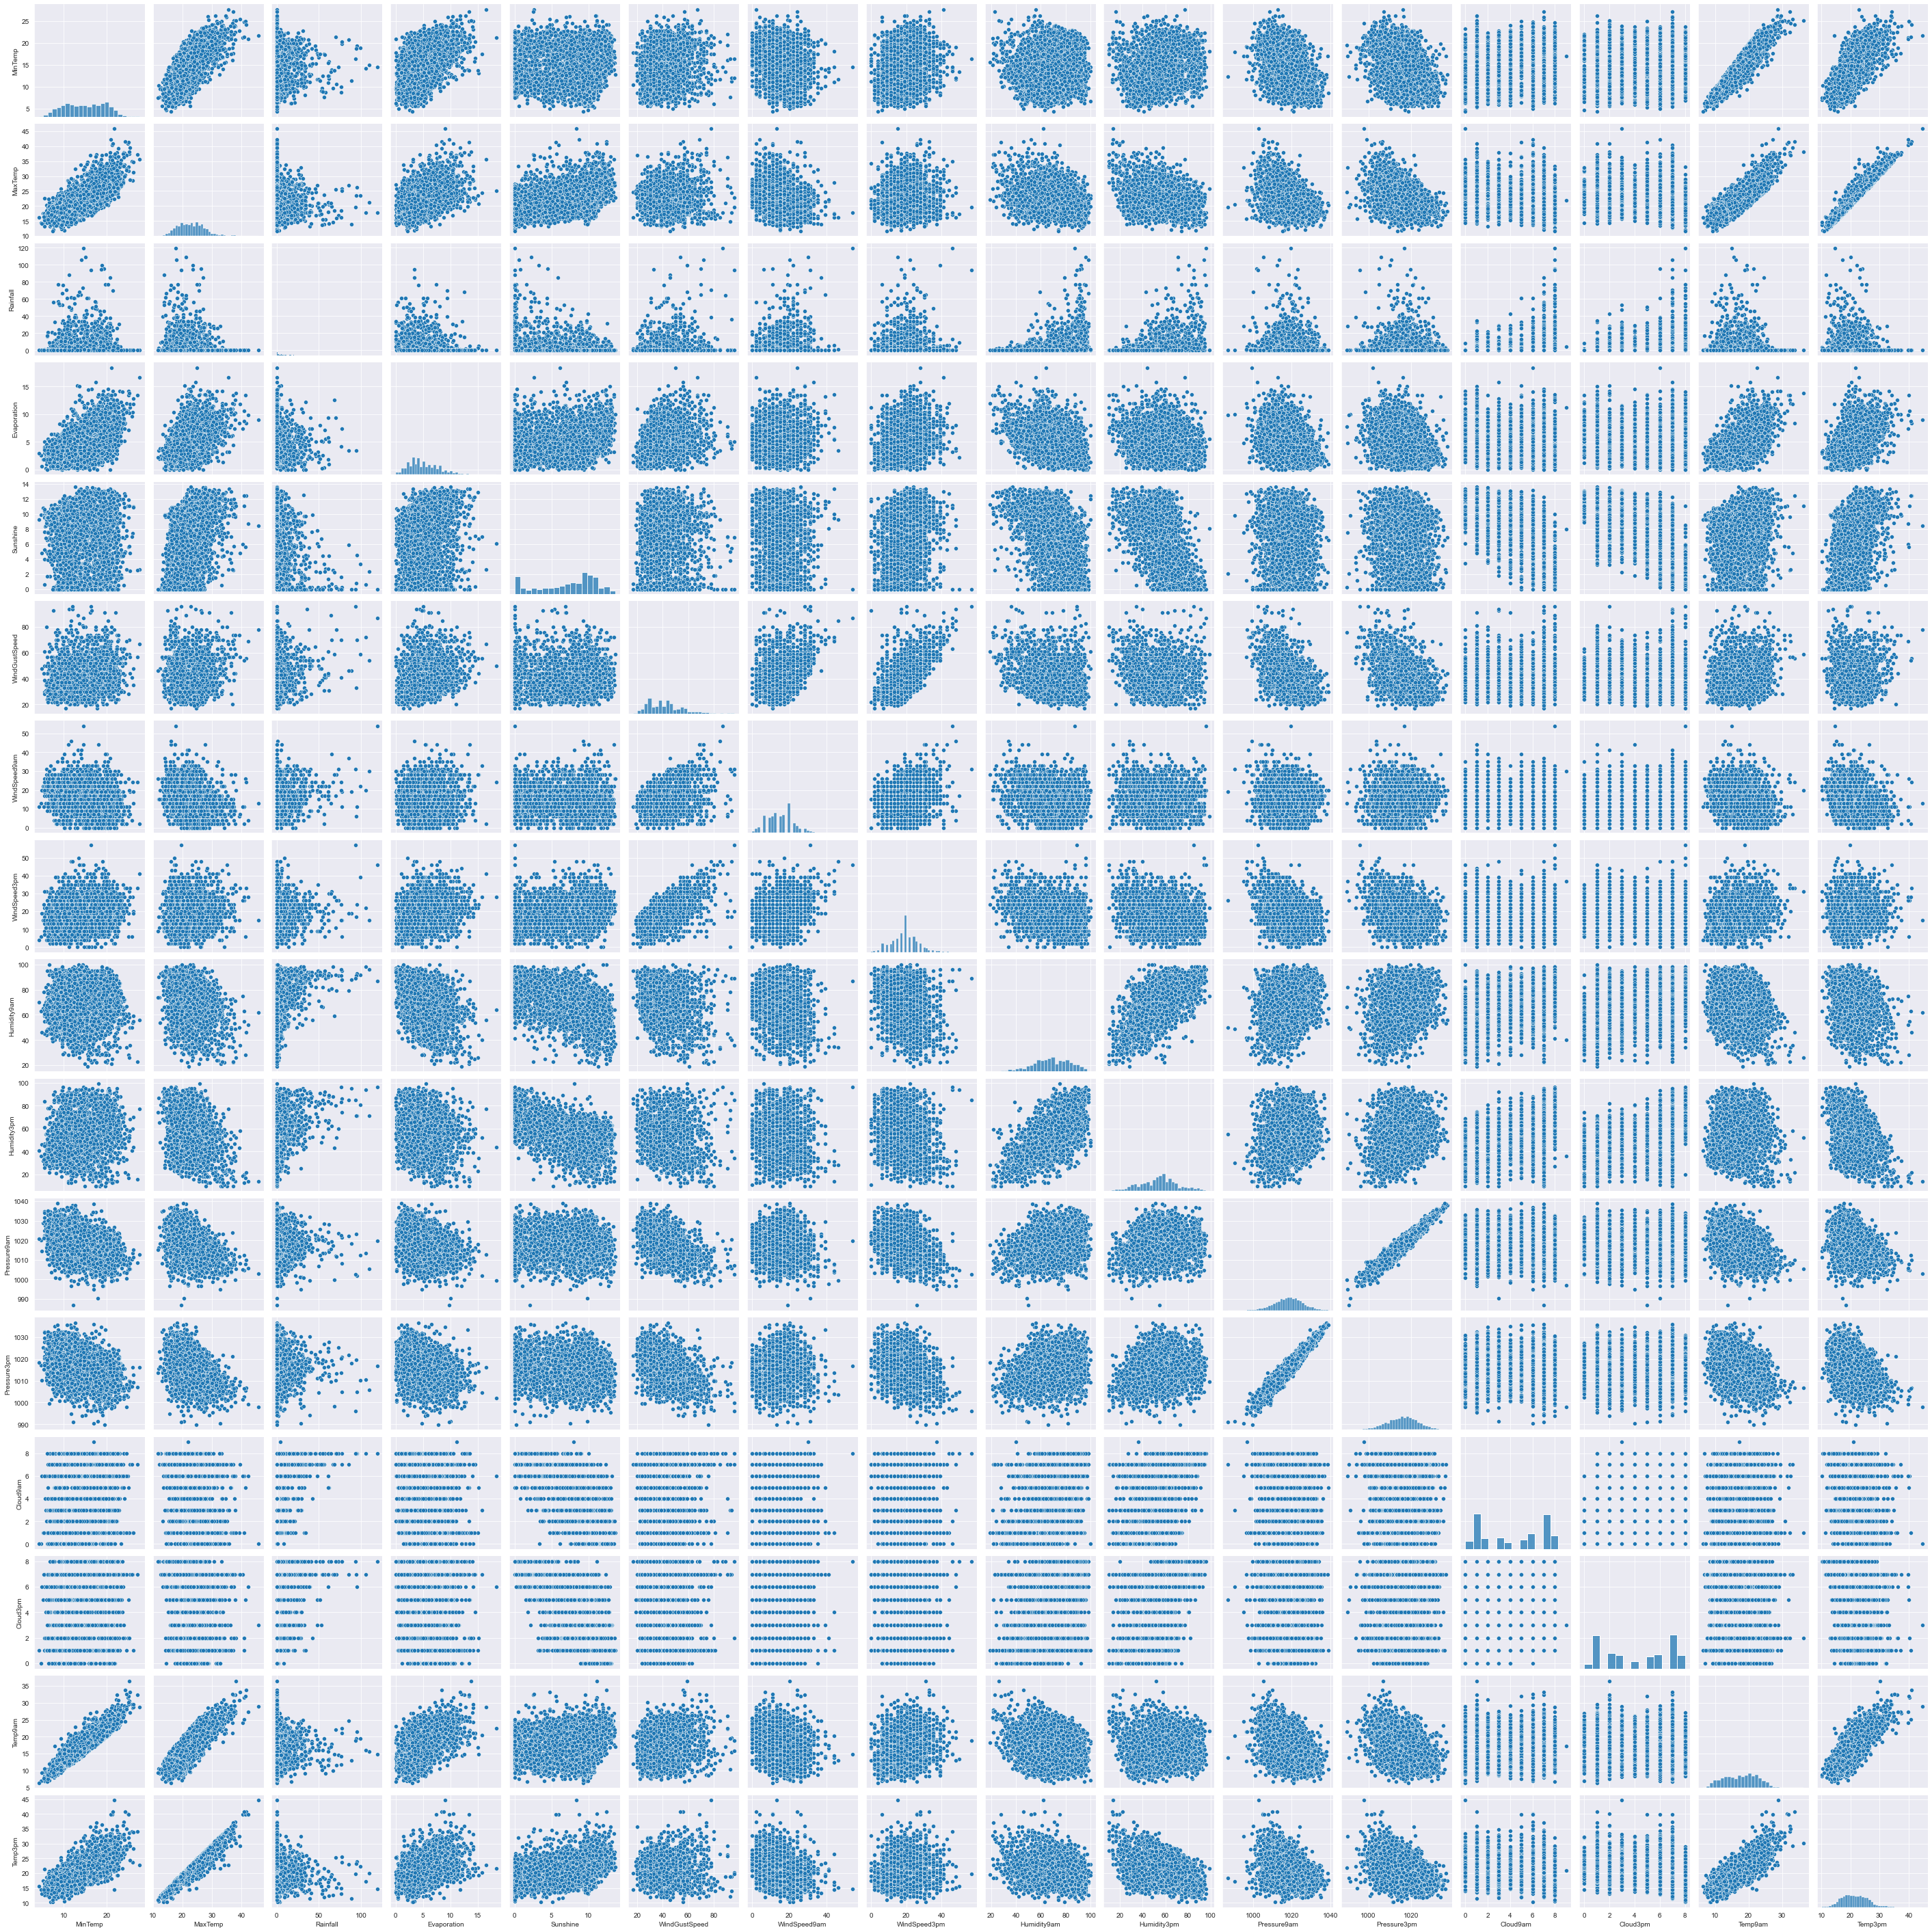

In [166]:
# 상관관계 시각화
sns.pairplot(floats)
# sns.set_style('darkgrid')
# plt.xticks(rotation=90)
plt.show()

In [167]:
floats.corr(method='pearson')

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.770461  0.012735     0.571549 -0.063352   
MaxTemp        0.770461  1.000000 -0.139968     0.513437  0.327355   
Rainfall       0.012735 -0.139968  1.000000    -0.126332 -0.307399   
Evaporation    0.571549  0.513437 -0.126332     1.000000  0.177359   
Sunshine      -0.063352  0.327355 -0.307399     0.177359  1.000000   
WindGustSpeed  0.152936  0.088114  0.172323     0.299394 -0.036461   
WindSpeed9am  -0.294792 -0.346385  0.154055    -0.076591 -0.059561   
WindSpeed3pm   0.223307  0.151797  0.039840     0.299602  0.177092   
Humidity9am    0.052596 -0.187342  0.331066    -0.398800 -0.490316   
Humidity3pm    0.271891 -0.152548  0.301590    -0.102956 -0.585325   
Pressure9am   -0.393417 -0.389251 -0.036914    -0.349273 -0.047863   
Pressure3pm   -0.355855 -0.425367  0.003328    -0.303301 -0.095963   
Cloud9am       0.259959 -0.096941  0.277358    -0.041986 -0.734493   
Cloud3pm       0.180220 -0.108205  0.229394    -0.040464 -0.751219   
Temp9am        0.939044  0.859225 -0.056187     0.609325  0.115385   
Temp3pm        0.752707  0.960453 -0.143620     0.477929  0.345615   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.152936     -0.294792      0.223307     0.052596   
MaxTemp             0.088114     -0.346385      0.151797    -0.187342   
Rainfall            0.172323      0.154055      0.039840     0.331066   
Evaporation         0.299394     -0.076591      0.299602    -0.398800   
Sunshine           -0.036461     -0.059561      0.177092    -0.490316   
WindGustSpeed       1.000000      0.311453      0.608910    -0.271754   
WindSpeed9am        0.311453      1.000000      0.198502    -0.192183   
WindSpeed3pm        0.608910      0.198502      1.000000    -0.290423   
Humidity9am        -0.271754     -0.192183     -0.290423     1.000000   
Humidity3pm        -0.117879     -0.152051     -0.135652     0.659305   
Pressure9am        -0.487213      0.002851     -0.330808     0.263610   
Pressure3pm        -0.419857      0.091525     -0.275674     0.251942   
Cloud9am            0.035586     -0.070941     -0.061411     0.459622   
Cloud3pm            0.069810     -0.018180     -0.100485     0.359511   
Temp9am             0.191401     -0.330320      0.276907    -0.148065   
Temp3pm             0.043393     -0.348675      0.132725    -0.157518   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.271891    -0.393417    -0.355855  0.259959  0.180220   
MaxTemp          -0.152548    -0.389251    -0.425367 -0.096941 -0.108205   
Rainfall          0.301590    -0.036914     0.003328  0.277358  0.229394   
Evaporation      -0.102956    -0.349273    -0.303301 -0.041986 -0.040464   
Sunshine         -0.585325    -0.047863    -0.095963 -0.734493 -0.751219   
WindGustSpeed    -0.117879    -0.487213    -0.419857  0.035586  0.069810   
WindSpeed9am     -0.152051     0.002851     0.091525 -0.070941 -0.018180   
WindSpeed3pm     -0.135652    -0.330808    -0.275674 -0.061411 -0.100485   
Humidity9am       0.659305     0.263610     0.251942  0.459622  0.359511   
Humidity3pm       1.000000     0.154757     0.183305  0.498215  0.517362   
Pressure9am       0.154757     1.000000     0.963163 -0.011775 -0.043864   
Pressure3pm       0.183305     0.963163     1.000000  0.021306 -0.002989   
Cloud9am          0.498215    -0.011775     0.021306  1.000000  0.609031   
Cloud3pm          0.517362    -0.043864    -0.002989  0.609031  1.000000   
Temp9am           0.128969    -0.419369    -0.404950  0.096213  0.074244   
Temp3pm          -0.213913    -0.346935    -0.392786 -0.099098 -0.159724   

                Temp9am   Temp3pm  
MinTemp        0.939044  0.752707  
MaxTemp        0.859225  0.960453  
Rainfall      -0.056187 -0.143620  
Evaporation    0.609325  0.477929  
Sunshine       0.115385  0.345615  
WindGustSpeed  0.191401  0.043393  
WindSpeed9am  -0.330320 -0.348675  
Wi

In [212]:
df.corr(method='pearson')

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

* 세 변수들 모두 0.7 이상의 상관계수를 가지는 변수들이 존재하지 않으나,  
* WindGustSpeed는 WindSpeed9am,WindSpeed3am에 0.6 이상의 상관관계를 가지고 있다.
* Cloud9am과 Cloud3pm는 Sunshine과 0.6이상의 상관관계를 가지고 있다.

In [269]:
#결측치 특징 제거
floats_1 = floats.drop(columns = ['WindGustSpeed','Cloud9am','Cloud3pm'])

In [258]:
#결측치 평균으로 처리
for col in floats_1.columns:
    floats_1[floats_1[col].isnull()] = floats_1[col].mean()

In [267]:
floats_1[floats_1['Evaporation'].isnull()] = floats_1['Evaporation'].mean()

In [261]:
floats_1.isnull().sum()

MinTemp          4
MaxTemp          2
Rainfall         7
Evaporation     51
Sunshine        16
WindSpeed9am    26
WindSpeed3pm    25
Humidity9am     15
Humidity3pm     13
Pressure9am     21
Pressure3pm     19
Temp9am          5
Temp3pm          4
dtype: int64

In [277]:
floats_1[floats_1['Evaporation'].isnull()]=1
floats_1

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindSpeed9am  \
30176     19.5     22.4      15.6          6.2       0.0          17.0   
30177     19.5     25.6       6.0          3.4       2.7           9.0   
30178     21.6     24.5       6.6          2.4       0.1          17.0   
30179     20.2     22.8      18.8          2.2       0.0          22.0   
30180      1.0      1.0       1.0          1.0       1.0           1.0   
...        ...      ...       ...          ...       ...           ...   
33515      8.6     19.6       0.0          2.0       7.8          22.0   
33516      9.3     19.2       0.0          2.0       9.2          20.0   
33517      9.4     17.7       0.0          2.4       2.7          15.0   
33518     10.1     19.3       0.0          1.4       9.3          17.0   
33519      7.6     19.3       0.0          3.4       9.4          13.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
30176          20.0         92.0         84.0       1017.6       1017.4   
30177          13.0         83.0         73.0       1017.9       1016.4   
30178           2.0         88.0         86.0       1016.7       1015.6   
30179          20.0         83.0         90.0       1014.2       1011.8   
30180           1.0          1.0          1.0          1.0          1.0   
...             ...          ...          ...          ...          ...   
33515          20.0         73.0         52.0       1025.9       1025.3   
33516           7.0         78.0         53.0       1028.5       1024.6   
33517          13.0         85.0         56.0       1020.8       1015.0   
33518          19.0         56.0         35.0       1017.3       1015.1   
33519          13.0         73.0         32.0       1018.6       1015.4   

       Temp9am  Temp3pm  
30176     20.7     20.9  
30177     22.4     24.8  
30178     23.5     23.0  
30179     21.4     20.9  
30180      1.0      1.0  
...        ...      ...  
33515     10.5     17.9  
33516     11.0     18.7  
33517     10.2     17.3  
33518     12.4     19.0  
33519      9.4     18.8  

[3344 rows x 13 columns]

In [251]:
floats_1[col].mean()

21.53347305389217

### 데이터 시각화

### 모델링

* 모델 성능에 영향을 줄 수 있는 요인들 :  
    1. 어떤 특징(feature)들을 사용 할 것인가?
    1. 결측치를 어떻게 다룰 것인가?
    1. 어떤 알고리즘을 이용해 학습시킬 것인가?
    1. 모델의 파라미터들이 최적인가?

### 평가

### 결론